In [1]:
from getpass import getpass
from vantage6.client import Client
from time import sleep
import json
import pandas as pd


from strata_fit_v6_km_py.types import DEFAULT_INTERVAL_START_COLUMN, DEFAULT_CUMULATIVE_INCIDENCE_COLUMN

def plot_km_curve(df_km):
    import matplotlib.pyplot as plt
    # convert months → years
    years = df_km["interval_start"] / 12
    cum_inc = df_km["cumulative_incidence"]

    plt.figure(figsize=(8, 5))
    plt.step(years, cum_inc, where='post', lw=2)
    plt.xlabel("Years from diagnosis")
    plt.ylabel("Cumulative incidence of D2T-RA")
    plt.title("Cumulative incidence of difficult-to-treat RA (KM estimate)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# CHANGED: Combined your config into a simple dict without Pydantic, Dynaconf, or validators
config = {
    'server_url': "https://stratafit.prod.medicaldataworks.nl",   
    'server_port': 443,
    'server_api': "/api",
    'username': "chiara-umcutrecht",                                  
    'password': getpass("Password: "),
    'mfa_code': getpass("2FA: "),                     
    'organization_key': r"C:\Users\cripepi2\coding\privkey_UMCUtrecht.pem"                               # Optional for encryption
}

# CHANGED: Initialize and authenticate client
client = Client(config['server_url'], config['server_port'], config['server_api'])
client.authenticate(config['username'], config['password'], mfa_code=config['mfa_code'])

if config['organization_key']:
    client.setup_encryption(config['organization_key'])    # 🔴 Optional encryption

# 🔴 OPTIONAL: List organizations and collaborations
print("Available collaborations:")
print(client.collaboration.list(fields=['id', 'name']))
print("\nAvailable organizations:")
print(client.organization.list(fields=['id', 'name']))

# 🔴 CHANGED: Define task input (you can replace this with your desired algorithm config)
task_input = {
    'method': 'kaplan_meier_central',                             # 🔴 Example method
    'kwargs': {
        'organizations_to_include': [5]
    }
}

# 🔴 CHANGED: Define task payload
task = client.task.create(
    collaboration=3,                                       
    organizations=[5],                                     
    name="demo-stats-task",
    image="ghcr.io/mdw-nl/strata-fit-v6-km-py@sha256:bc4d691aac6da06767b813800557c2868da2e1b30121ffeaf0c1211bd9f739a1",
    description="KM",
    databases=[{'label': 'dataset_202504'}],
    input_=task_input
)

# 🔴 CHANGED: Wait for results
print("\nWaiting for results...")
task_id = task["id"]
result_info = client.wait_for_results(task_id)
result_data = client.result.from_task(task_id=task_id)

# 🔴 Display nicely
print("\nResults:")
for item in result_data['data']:
    print(json.dumps(item['result'], indent=2))


 Welcome to
                  _                     __  
                 | |                   / /  
__   ____ _ _ __ | |_ __ _  __ _  ___ / /_  
\ \ / / _` | '_ \| __/ _` |/ _` |/ _ \ '_ \ 
 \ V / (_| | | | | || (_| | (_| |  __/ (_) |
  \_/ \__,_|_| |_|\__\__,_|\__, |\___|\___/ 
                            __/ |           
                           |___/            

 --> Join us on Discord! https://discord.gg/rwRvwyK
 --> Docs: https://docs.vantage6.ai
 --> Blog: https://vantage6.ai
------------------------------------------------------------
Cite us!
If you publish your findings obtained using vantage6, 
please cite the proper sources as mentioned in:
https://vantage6.ai/vantage6/references
------------------------------------------------------------
Successfully authenticated
 --> Succesfully authenticated
 --> Name: Chiara (id=12)
 --> Organization: UMCUtrecht (id=5)
Public key matches the server key! Good to go!
Available collaborations:
[{'id': 2, 'name': 'STRATAFIT-demo'}, {'

In [2]:
result_data

{'data': [{'result': '"{\\"interval_start\\":{\\"0\\":0,\\"1\\":1,\\"2\\":2,\\"3\\":3,\\"4\\":5,\\"5\\":6,\\"6\\":7,\\"7\\":8,\\"8\\":9,\\"9\\":10,\\"10\\":11,\\"11\\":13,\\"12\\":14,\\"13\\":15,\\"14\\":16,\\"15\\":17,\\"16\\":18,\\"17\\":19,\\"18\\":20,\\"19\\":21,\\"20\\":22,\\"21\\":23,\\"22\\":24,\\"23\\":26,\\"24\\":27,\\"25\\":28,\\"26\\":29,\\"27\\":30,\\"28\\":31,\\"29\\":32,\\"30\\":33,\\"31\\":34,\\"32\\":35,\\"33\\":36,\\"34\\":37,\\"35\\":38,\\"36\\":39,\\"37\\":40,\\"38\\":41,\\"39\\":42,\\"40\\":43,\\"41\\":44,\\"42\\":45,\\"43\\":46,\\"44\\":47,\\"45\\":48,\\"46\\":49,\\"47\\":50,\\"48\\":51,\\"49\\":52,\\"50\\":53,\\"51\\":54,\\"52\\":55,\\"53\\":56,\\"54\\":57,\\"55\\":58,\\"56\\":59,\\"57\\":60,\\"58\\":61,\\"59\\":62,\\"60\\":63,\\"61\\":64,\\"62\\":65,\\"63\\":66,\\"64\\":67,\\"65\\":68,\\"66\\":69,\\"67\\":70,\\"68\\":71,\\"69\\":72,\\"70\\":73,\\"71\\":74,\\"72\\":75,\\"73\\":76,\\"74\\":77,\\"75\\":78,\\"76\\":79,\\"77\\":80,\\"78\\":81,\\"79\\":82,\\"80\\":83,\

In [9]:
json_string = json.loads(result_data['data'][0]['result'])

In [10]:
type(json_string)

str

In [11]:
json.loads(json_string)

{'interval_start': {'0': 0,
  '1': 1,
  '2': 2,
  '3': 3,
  '4': 5,
  '5': 6,
  '6': 7,
  '7': 8,
  '8': 9,
  '9': 10,
  '10': 11,
  '11': 13,
  '12': 14,
  '13': 15,
  '14': 16,
  '15': 17,
  '16': 18,
  '17': 19,
  '18': 20,
  '19': 21,
  '20': 22,
  '21': 23,
  '22': 24,
  '23': 26,
  '24': 27,
  '25': 28,
  '26': 29,
  '27': 30,
  '28': 31,
  '29': 32,
  '30': 33,
  '31': 34,
  '32': 35,
  '33': 36,
  '34': 37,
  '35': 38,
  '36': 39,
  '37': 40,
  '38': 41,
  '39': 42,
  '40': 43,
  '41': 44,
  '42': 45,
  '43': 46,
  '44': 47,
  '45': 48,
  '46': 49,
  '47': 50,
  '48': 51,
  '49': 52,
  '50': 53,
  '51': 54,
  '52': 55,
  '53': 56,
  '54': 57,
  '55': 58,
  '56': 59,
  '57': 60,
  '58': 61,
  '59': 62,
  '60': 63,
  '61': 64,
  '62': 65,
  '63': 66,
  '64': 67,
  '65': 68,
  '66': 69,
  '67': 70,
  '68': 71,
  '69': 72,
  '70': 73,
  '71': 74,
  '72': 75,
  '73': 76,
  '74': 77,
  '75': 78,
  '76': 79,
  '77': 80,
  '78': 81,
  '79': 82,
  '80': 83,
  '81': 84,
  '82': 85,
  '83

In [13]:
df_km= pd.read_json(json_string)

C:\Users\cripepi2\AppData\Local\Temp\ipykernel_32988\2202745238.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_km= pd.read_json(json_string)


Kaplan–Meier curve (first 5 rows):
   interval_start  removed  observed  interval  censored  at_risk  hazard  \
0               0        2         0         0         2     1480     0.0   
1               1        1         0         0         1     1478     0.0   
2               2        1         0         0         1     1477     0.0   
3               3        1         0         0         1     1476     0.0   
4               5        2         0         0         2     1475     0.0   

   cumulative_incidence  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0   

Summary statistics:
       interval_start     removed    observed  interval    censored  \
count      222.000000  222.000000  222.000000     222.0  222.000000   
mean       113.504505    6.666667    0.450450       0.0    6.216216   
std         64.757029    5.406270    0.837349       0.0    5.350021   
min          0.000000    1.000000    0.0

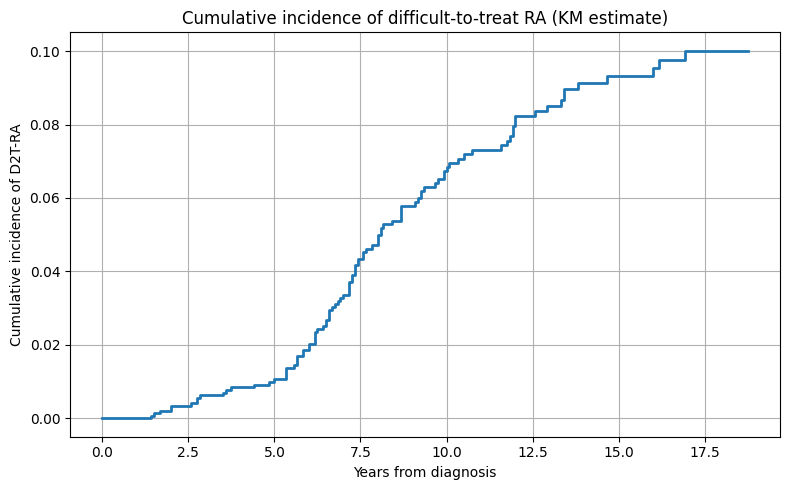


✅ Central Kaplan–Meier test completed successfully.


In [14]:

# --- 5. Inspect / assert ---
print("Kaplan–Meier curve (first 5 rows):")
print(df_km.head(), "\n")

print("Summary statistics:")
# print(df_km[["at_risk", "observed", "censored", "interval", "hazard", DEFAULT_CUMULATIVE_INCIDENCE_COLUMN]].describe())
print(df_km.describe())

# Example assertion (ensure we have at least one time‐point and survival_cdf is ≤1):
assert not df_km.empty
assert df_km[DEFAULT_CUMULATIVE_INCIDENCE_COLUMN].max() <= 1.0

# plotting
plot_km_curve(df_km)

print("\n✅ Central Kaplan–Meier test completed successfully.")